In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
data = pd.read_csv('./Bank_Customer.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
customer_id         10000 non-null int64
credit_score        10000 non-null int64
country             10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
tenure              10000 non-null int64
balance             10000 non-null float64
products_number     10000 non-null int64
credit_card         10000 non-null int64
active_member       10000 non-null int64
estimated_salary    10000 non-null float64
churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [11]:
columns = data.columns
array = []
for count in columns:
    array.append(count)
array.remove(array[11])
print(array)

['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']


In [12]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ff4fa5cd0>]],
      dtype=object)

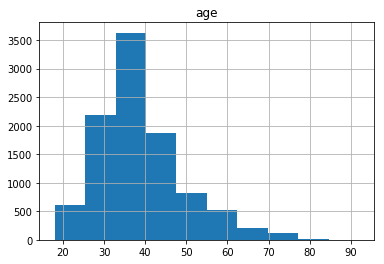

In [13]:
user =  data.copy()
user.hist(column="age")

<BarContainer object of 2 artists>

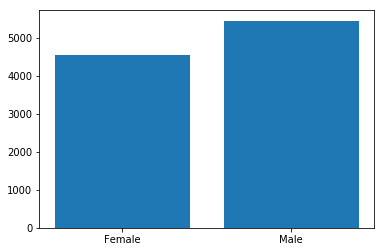

In [14]:
gender = user.groupby('gender').size()
x=['Female','Male']
y = [gender[0],gender[1]]
plt.bar(x,y)

<BarContainer object of 2 artists>

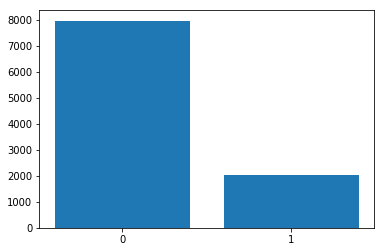

In [15]:
churn = user.groupby('churn').size()
x=['0','1']
y = [churn[0],churn[1]]
plt.bar(x,y)

In [16]:
user['gender'].replace(['Female','Male'],[0,1],inplace= True)
print(user['gender'])

0       0
1       0
2       0
3       0
4       0
5       1
6       1
7       0
8       1
9       1
10      1
11      1
12      0
13      0
14      0
15      1
16      1
17      0
18      1
19      0
20      1
21      0
22      0
23      1
24      0
25      1
26      1
27      1
28      0
29      1
       ..
9970    1
9971    0
9972    1
9973    1
9974    1
9975    1
9976    0
9977    0
9978    1
9979    0
9980    1
9981    1
9982    0
9983    1
9984    1
9985    1
9986    1
9987    1
9988    1
9989    1
9990    1
9991    0
9992    1
9993    1
9994    0
9995    1
9996    1
9997    0
9998    1
9999    0
Name: gender, Length: 10000, dtype: int64


In [17]:
user['country'].replace(['France','Spain','Germany'],[0,1,2],inplace= True)
print(user['country'])

0       0
1       1
2       0
3       0
4       1
5       1
6       0
7       2
8       0
9       0
10      0
11      1
12      0
13      0
14      1
15      2
16      2
17      1
18      1
19      0
20      0
21      1
22      1
23      0
24      0
25      0
26      2
27      0
28      2
29      0
       ..
9970    0
9971    0
9972    0
9973    0
9974    0
9975    2
9976    0
9977    0
9978    0
9979    0
9980    1
9981    2
9982    2
9983    0
9984    2
9985    0
9986    2
9987    1
9988    0
9989    1
9990    2
9991    0
9992    1
9993    0
9994    0
9995    0
9996    0
9997    0
9998    2
9999    0
Name: country, Length: 10000, dtype: int64


In [18]:


# data.loc(user[''])
#X 代表輸入資料, y 代表輸出結果
y = user['churn']                   # 變出 y 資料
X = user.drop(['churn','customer_id'], axis=1) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

score_gini=[]
for count in range(1,10):

    model_gini = DecisionTreeClassifier(criterion='gini',max_depth=count)
    model_gini.fit(X_train, y_train)
    model_gini.predict(X_test)
    score_gini.append(model_gini.score(X_test, y_test))
    print(classification_report(y_test,model_gini.predict(X_test)))

print(score_gini)




              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1579
           1       0.00      0.00      0.00       421

   micro avg       0.79      0.79      0.79      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.62      0.79      0.70      2000

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1579
           1       0.62      0.43      0.51       421

   micro avg       0.82      0.82      0.82      2000
   macro avg       0.74      0.68      0.70      2000
weighted avg       0.81      0.82      0.81      2000

              precision    recall  f1-score   support

           0       0.83      0.99      0.91      1579
           1       0.92      0.24      0.38       421

   micro avg       0.84      0.84      0.84      2000
   macro avg       0.87      0.62      0.64      2000
weighted avg       0.85      0.84      0.79      2000

              preci

/home/hui/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
score_entropy=[]
for count in range(1,10):

    model_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=count)
    model_entropy.fit(X_train, y_train)
    model_entropy.predict(X_test)
    score_entropy.append(model_entropy.score(X_test, y_test))
    print(classification_report(y_test,model_entropy.predict(X_test)))

print(score_entropy)


              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1579
           1       0.00      0.00      0.00       421

   micro avg       0.79      0.79      0.79      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.62      0.79      0.70      2000

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1579
           1       0.62      0.43      0.51       421

   micro avg       0.82      0.82      0.82      2000
   macro avg       0.74      0.68      0.70      2000
weighted avg       0.81      0.82      0.81      2000

              precision    recall  f1-score   support

           0       0.83      0.99      0.91      1579
           1       0.92      0.24      0.38       421

   micro avg       0.84      0.84      0.84      2000
   macro avg       0.87      0.62      0.64      2000
weighted avg       0.85      0.84      0.79      2000

              preci

In [21]:
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=5)
model_gini.fit(X_train, y_train)
model_gini.predict(X_test)
score_gini.append(model_gini.score(X_test, y_test))
print(classification_report(y_test,model_gini.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1579
           1       0.72      0.49      0.58       421

   micro avg       0.85      0.85      0.85      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.84      0.85      0.84      2000



In [22]:
model_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=5)
model_entropy.fit(X_train, y_train)
model_entropy.predict(X_test)
score_entropy.append(model_entropy.score(X_test, y_test))
print(classification_report(y_test,model_entropy.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1579
           1       0.75      0.43      0.54       421

   micro avg       0.85      0.85      0.85      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.84      0.85      0.83      2000



In [23]:
from sklearn.tree import export_graphviz
export_graphviz(model_entropy, out_file='entropy.dot',
                feature_names=['credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary'],
                class_names=str(model_entropy.classes_))

export_graphviz(model_gini, out_file='gini.dot',
                feature_names=['credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary'],
                class_names=str(model_gini.classes_))

Text(0.5,1,'score_gini')

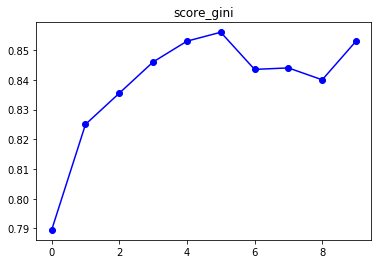

In [24]:
plt.plot(score_gini,'-bo')
# plt.text(score_gini,num2str(str))
plt.title('score_gini')

Text(0.5,1,'score_entropy')

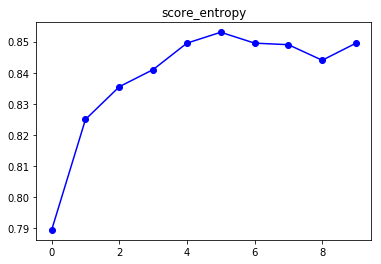

In [25]:
plt.plot(score_entropy,'-bo')
plt.title('score_entropy')